<a href="https://colab.research.google.com/github/acmolina65/Analisis-estadistico/blob/main/analisis_pandas_tasas_de_interes_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from io import StringIO

# Los datos en formato de texto
data = """
Tipo_Entidad,Nombre_Tipo_Entidad,Codigo_Entidad,Nombre_Entidad,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Producto de crédito,Plazo de crédito,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Grupo_Etnico,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio
1,BC-ESTABLECIMIENTO BANCARIO,1,Banco de Bogotá,05/07/2024,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Consumos a un mes,0,0,10352916,2,Sin información (1),No aplica(1),FS,Mayor a 3 SMLMV menor o igual a 5 SMLMV,Deudor de la entidad,0010,41001
1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,05/07/2024,Jurídica,No aplica,Pequeña empresa,Comercial ordinario,Garantia idónea o no idónea,Tarjeta de crédito empresarial,Consumos a un mes,0,0,691080,1,No aplica,más de 10 años,FS,Hasta 1 SMLMV,Deudor de la entidad,4664,05266
1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,05/07/2024,Natural,Masculino,No aplica,Consumo,Garantia idónea o no idónea,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Consumos a un mes,0,0,458853,8,Ningún grupo étnico,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,0210,63001
1,BC-ESTABLECIMIENTO BANCARIO,39,Banco Davivienda,05/07/2024,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Consumos a un mes,0,0,5569835.31,53,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,0082,08001
4,CF-COMPAÑÍA DE FINANCIAMIENTO,121,Financiera Juriscoop C.F.,05/07/2024,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Consumos a un mes,0,0,60000,1,Sin información (1),No aplica(1),FS,Mayor a 3 SMLMV menor o igual a 5 SMLMV,Deudor nuevo en la entidad,0010,66001
1,BC-ESTABLECIMIENTO BANCARIO,43,Banagrario,05/07/2024,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Consumos entre 19 y 24 meses,25.49,0,184708,1,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,0010,70418
1,BC-ESTABLECIMIENTO BANCARIO,30,Banco Caja Social S.A.,05/07/2024,Natural,Masculino,Microempresa,Comercial ordinario,Sin garantia,Tarjeta de crédito empresarial,Consumos a un mes,27.99,0,213900,3,Sin información (1),más de 10 años,FS,Hasta 1 SMLMV,Deudor de la entidad,8699,11001
4,CF-COMPAÑÍA DE FINANCIAMIENTO,26,Tuya,05/07/2024,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Consumos a un mes,0,0,53762,2,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,0113,25290
1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,05/07/2024,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Consumos a un mes,0,0,392239,2,Ningún grupo étnico,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,0141,05147
1,BC-ESTABLECIMIENTO BANCARIO,55,Finandina,05/07/2024,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Avances en efectivo,29.39,0,600000,1,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,0090,05129
1,BC-ESTABLECIMIENTO BANCARIO,43,Banagrario,05/07/2024,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Consumos entre 2 y 6 meses,24.46,0,82680,2,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,0150,27006
1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,05/07/2024,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Consumos a un mes,9.78,0,2334800,18,Ningún grupo étnico,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,0010,05656
1,BC-ESTABLECIMIENTO BANCARIO,1,Banco de Bogotá,05/07/2024,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Consumos a un mes,0,0,94551,1,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,7120,11001
1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,05/07/2024,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Consumos a un mes,29.43,0,38900,1,Ningún grupo étnico,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,9602,25754
1,BC-ESTABLECIMIENTO BANCARIO,39,Banco Davivienda,05/07/2024,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Consumos a un mes,0,0,71508,2,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,0010,05664
1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,05/07/2024,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Consumos a un mes,0,0,68500,3,Ningún grupo étnico,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,0010,66456
1,BC-ESTABLECIMIENTO BANCARIO,56,Banco Falabella S.A.,05/07/2024,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Avances en efectivo,29.48,0,7000000,1,Sin información (1),No aplica(1),FS,Mayor a 3 SMLMV menor o igual a 5 SMLMV,Deudor de la entidad,6820,11001
1,BC-ESTABLECIMIENTO BANCARIO,43,Banagrario,05/07/2024,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Avances en efectivo,25.49,0,100000,1,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,0010,20013
1,BC-ESTABLECIMIENTO BANCARIO,56,Banco Falabella S.A.,05/07/2024,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Consumos a un mes,0,0,87820,1,Ningún grupo étnico,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,4781,85001
1,BC-ESTABLECIMIENTO BANCARIO,1,Banco de Bogotá,05/07/2024,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Consumos a un mes,0,0,960426,11,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,3313,11001
1,BC-ESTABLECIMIENTO BANCARIO,58,Coopcentral,05/07/2024,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Consumos entre 2 y 6 meses,20.88,0,1447726,6,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,0010,08001
1,BC-ESTABLECIMIENTO BANCARIO,39,Banco Davivienda,05/07/2024,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a 2 SMMLV,Consumos a un mes,0,0,16900,1,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,4643,76520
1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,05/07/2024,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Tarjeta de crédito empresarial,Consumos a un mes,0,0,924000,4,No aplica,más de 10 años,FS,Hasta 1 SMLMV,Deudor de la entidad,7820,08001
"""

# Leer los datos
df = pd.read_csv(StringIO(data))


In [ ]:
print(df.head())

   Tipo_Entidad            Nombre_Tipo_Entidad  Codigo_Entidad  \
0             1    BC-ESTABLECIMIENTO BANCARIO               1   
1             1    BC-ESTABLECIMIENTO BANCARIO               7   
2             1    BC-ESTABLECIMIENTO BANCARIO               7   
3             1    BC-ESTABLECIMIENTO BANCARIO              39   
4             4  CF-COMPAÑÍA DE FINANCIAMIENTO             121   

              Nombre_Entidad Fecha_Corte Tipo_de_persona       Sexo  \
0            Banco de Bogotá  05/07/2024         Natural   Femenino   
1                Bancolombia  05/07/2024        Jurídica  No aplica   
2                Bancolombia  05/07/2024         Natural  Masculino   
3           Banco Davivienda  05/07/2024         Natural  Masculino   
4  Financiera Juriscoop C.F.  05/07/2024         Natural   Femenino   

  Tamaño_de_empresa      Tipo_de_crédito             Tipo_de_garantía  ...  \
0         No aplica              Consumo                 Sin garantia  ...   
1   Pequeña empresa 

In [ ]:
print(df.dtypes)

Tipo_Entidad                          int64
Nombre_Tipo_Entidad                  object
Codigo_Entidad                        int64
Nombre_Entidad                       object
Fecha_Corte                          object
Tipo_de_persona                      object
Sexo                                 object
Tamaño_de_empresa                    object
Tipo_de_crédito                      object
Tipo_de_garantía                     object
Producto de crédito                  object
Plazo de crédito                     object
Tasa_efectiva_promedio_ponderada    float64
margen_adicional                      int64
Montos_desembolsados                float64
Numero_de_creditos_desembolsados      int64
Grupo_Etnico                         object
Antiguedad_de_la_empresa             object
Tipo_de_Tasa                         object
Rango_monto_desembolsado             object
Clase_deudor                         object
Codigo_CIIU                           int64
Codigo_Municipio                

In [ ]:
df['Fecha_Corte'] = pd.to_datetime(df['Fecha_Corte'], format='%d/%m/%Y')

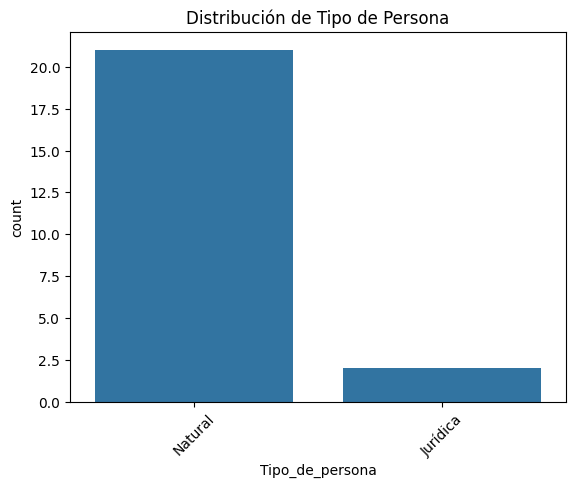

In [ ]:
sns.countplot(data=df, x='Tipo_de_persona')
plt.title('Distribución de Tipo de Persona')
plt.xticks(rotation=45)
plt.show()

**En la data verificada evidenciamos mayor cantidad de clientes persona Natural**

In [ ]:
df_filtrado = df[df['Sexo'] != 'No aplica']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

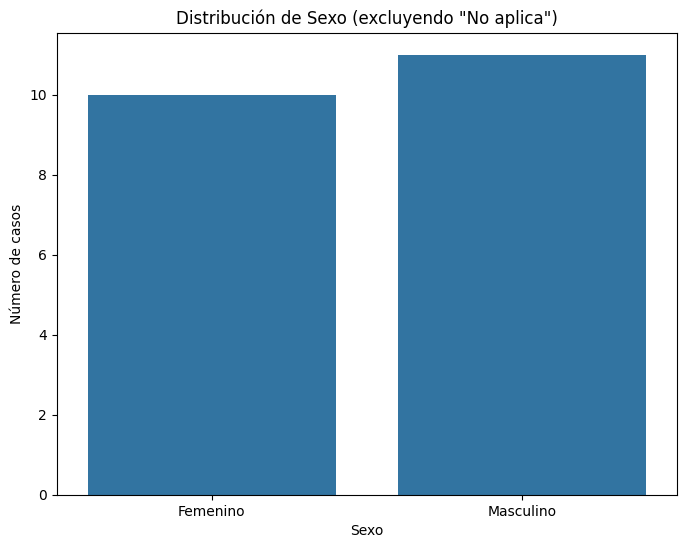

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_filtrado, x='Sexo')
plt.title('Distribución de Sexo (excluyendo "No aplica")')
plt.xlabel('Sexo')
plt.ylabel('Número de casos')
plt.show()

Se puede evidenciar mayor cantidad de productos para clientes de sexo Masculino

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO

In [ ]:
municipios_dict = {
    41001: 'Bogotá',
    63001: 'Cali',
    76520: 'Bucaramanga',
    11001: 'Bogotá',
}
    # Añadir más códigos y nombres según sea necesario


In [ ]:
df['Nombre_Ciudad'] = df['Codigo_Municipio'].map(municipios_dict)

In [ ]:
print(df[['Codigo_Municipio', 'Nombre_Ciudad']])

    Codigo_Municipio Nombre_Ciudad
0              41001        Bogotá
1               5266           NaN
2              63001          Cali
3               8001           NaN
4              66001           NaN
5              70418           NaN
6              11001        Bogotá
7              25290           NaN
8               5147           NaN
9               5129           NaN
10             27006           NaN
11              5656           NaN
12             11001        Bogotá
13             25754           NaN
14              5664           NaN
15             66456           NaN
16             11001        Bogotá
17             20013           NaN
18             85001           NaN
19             11001        Bogotá
20              8001           NaN
21             76520   Bucaramanga
22              8001           NaN


In [ ]:
conteo_por_ciudad = df['Nombre_Ciudad'].value_counts()

In [ ]:
top_2_ciudades = conteo_por_ciudad.head(2).index

In [ ]:
df_top_2 = df[df['Nombre_Ciudad'].isin(top_2_ciudades)]

In [ ]:
conteo_top_2_ciudades = df_top_2['Nombre_Ciudad'].value_counts()

In [ ]:
df_conteo_top_2_ciudades = conteo_top_2_ciudades.reset_index()
df_conteo_top_2_ciudades.columns = ['Nombre_Ciudad', 'Numero_de_Casos']

<ipython-input-63-6267ba015787>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_conteo_top_2_ciudades, x='Nombre_Ciudad', y='Numero_de_Casos', palette='viridis')


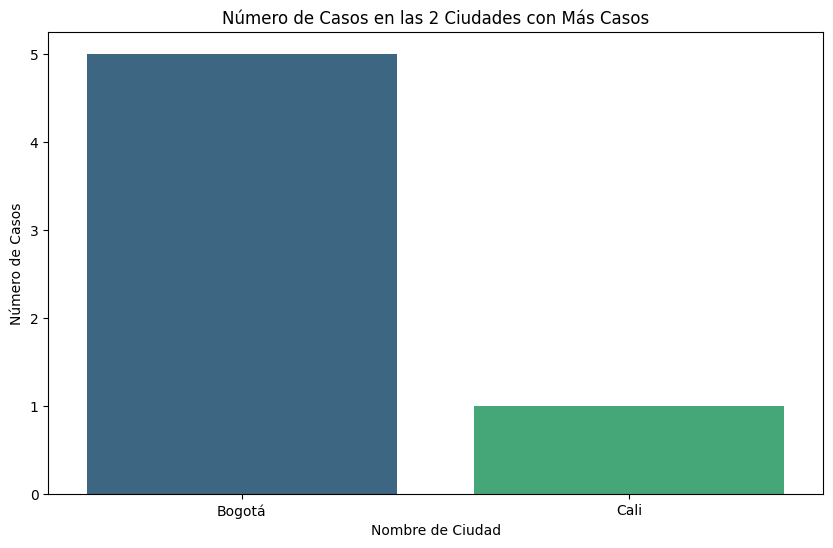

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_conteo_top_2_ciudades, x='Nombre_Ciudad', y='Numero_de_Casos', palette='viridis')
plt.title('Número de Casos en las 2 Ciudades con Más Casos')
plt.xlabel('Nombre de Ciudad')
plt.ylabel('Número de Casos')
plt.show()

## **Se puede evidenciar mayor cantidad de clientes en la ciudad de Bogotá**



In [ ]:
df = pd.read_csv(StringIO(data))

In [ ]:
df['Montos_desembolsados'] = pd.to_numeric(df['Montos_desembolsados'], errors='coerce')

In [ ]:
df_grouped = df.groupby('Nombre_Entidad')['Montos_desembolsados'].sum().reset_index()

In [ ]:
df_grouped = df_grouped.sort_values(by='Montos_desembolsados', ascending=False)

<ipython-input-76-4d8971b259ed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Montos_desembolsados', y='Nombre_Entidad', data=df_grouped, palette='viridis')


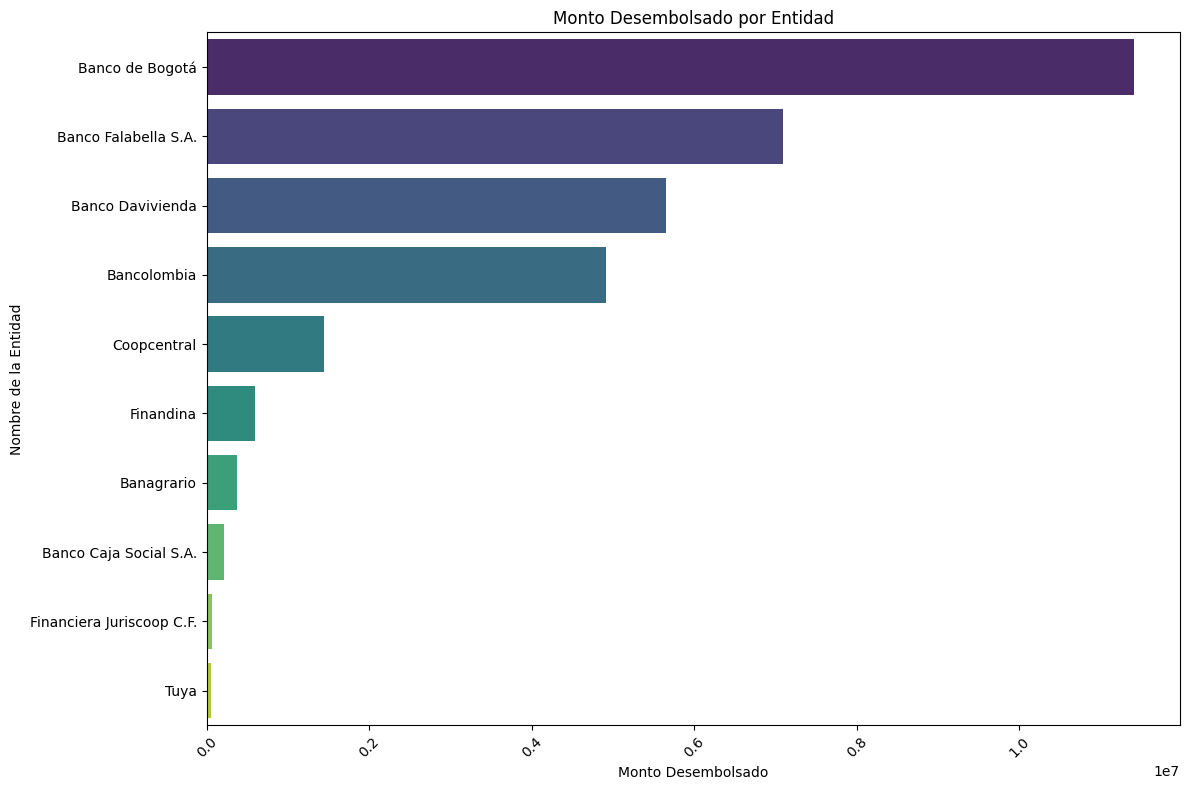

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Montos_desembolsados', y='Nombre_Entidad', data=df_grouped, palette='viridis')
plt.title('Monto Desembolsado por Entidad')
plt.xlabel('Monto Desembolsado')
plt.ylabel('Nombre de la Entidad')
plt.xticks(rotation=45)
plt.tight_layout()